In [28]:
import pandas as pd

d = pd.read_csv('ipl-matches.csv')
df = pd.DataFrame(d)
# print(df)
# print(df.info())
# print(df.nunique())

# changed_name = {'Delhi Daredevils':'Delhi Capitals','KingS XI Punjab':'Punjab Kings','Rising Pune Supergiants':'Rising Pune Supergiant'}
# df = df.replace(changed_name.keys(),changed_name.values())
# print(df)

# df = df.dropna()
# teams = df.Team1.unique()
# new_df = pd.DataFrame()
# data = []
# for team in teams:
#     played = df[(df.Team1 == team) | (df.Team2 == team)].shape[0]
#     win = df[df.WinningTeam == team].shape[0]
#     home_win = df[(df.WinningTeam == team) & (df.Team1 == team)].shape[0]/df[df['Team1']==team].shape[0]*100
#     away_win = df[(df.WinningTeam == team) & (df.Team2 == team)].shape[0]/df[df['Team2']==team].shape[0]*100
#     data.append([team,played,(win/played)*100,home_win,away_win])
# new_df[['Team','match_played','win%','home%','away%']] = data
# print(new_df)

In [34]:
d = pd.read_csv('ipl-matches.csv')
df = pd.DataFrame(d)
new_df = pd.DataFrame()
teams = df.Team1.unique()
data = []
for team in teams:
    played = df[((df.Team1 == team) | (df.Team2 == team)) & (df.Season == '2022')].shape[0]
    win = df[(df.WinningTeam == team) & (df.Season == '2022')].shape[0]
    points = win*2
    data.append([team,played,win,points])
new_df[['Team','played','win','points']] = data
print(new_df)

                           Team  played  win  points
0              Rajasthan Royals      17   10      20
1   Royal Challengers Bangalore      16    9      18
2           Sunrisers Hyderabad      14    6      12
3                Delhi Capitals      14    7      14
4           Chennai Super Kings      14    4       8
5                Gujarat Titans      16   12      24
6          Lucknow Super Giants      15    9      18
7         Kolkata Knight Riders      14    6      12
8                  Punjab Kings      14    7      14
9                Mumbai Indians      14    4       8
10              Kings XI Punjab       0    0       0
11             Delhi Daredevils       0    0       0
12       Rising Pune Supergiant       0    0       0
13                Gujarat Lions       0    0       0
14      Rising Pune Supergiants       0    0       0
15                Pune Warriors       0    0       0
16              Deccan Chargers       0    0       0
17         Kochi Tuskers Kerala       0    0  

In [67]:
d = pd.read_csv('train.csv')
df = pd.DataFrame(d)
# print(df)
# print(df.shape)
# print(df.isna())
# print(df.describe())
# print(df.describe(exclude=np.number))
# print(df.nunique())
# print(df.duplicated())

# changed = {0:'die',1:'survive'}
# df['Survived'] = df.replace(changed.keys(),changed.values())
# c_cabin = df['Cabin'].astype('str')
# c_cabin = np.array([Cabin[0] for Cabin in c_cabin])
# new_cabin = pd.Categorical(c_cabin)
# new_cabin.describe()
# df['Cabin'] = new_cabin
# print(df)

# df['Age'] = df['Age'].fillna(df['Age'].mean())
# print(df)

bins = [0,12,18,30,50,100]
labels = ['child','teenager','young adult','adult','senior']
df['AgeGroup'] = pd.cut(df['Age'],bins=bins,labels=labels)
pd.crosstab([df['AgeGroup'],df['Sex']],df['Survived'])

Survived              0   1
AgeGroup    Sex            
child       female   13  19
            male     16  21
teenager    female    9  27
            male     31   3
young adult female   22  68
            male    152  28
adult       female   19  67
            male    120  35
senior      female    1  16
            male     41   6

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int

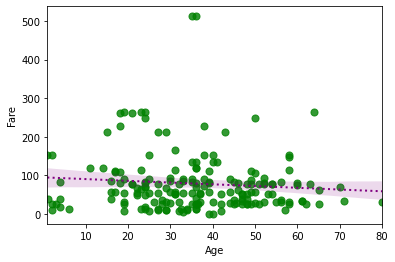

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns

d = pd.read_csv('CSV file/train.csv')
df = pd.DataFrame(d)
print(df.info())                                                                                                         #1
print()
print(df.isna().sum())                                                                                                   #2
print()
df = df.dropna()                                                                                                         #3
print(df.describe(exclude=np.number))                                                                                    #4
print()
#print(sns.heatmap(df.corr(),annot=True))                                                                                #5
#print(sns.regplot(x=df['Fare'],y=df['Survived'],scatter_kws={'color':'green','marker':'d','s':50}))                     #6
c_tab = pd.crosstab(df['Survived'],df['Sex'],rownames=['a'],colnames=['b'])                                              #7
print(c_tab)
#print(sns.heatmap(data = c_tab,annot=True))
#print(pd.plotting.parallel_coordinates(df,'Survived',cols=['Pclass','Fare','Age'],color=['red','blue','green','orange']))#8
print(sns.regplot(x=df['Age'],y=df['Fare'],scatter_kws={'color':'green','marker':'v','s':50},                                
            line_kws={'color':'purple','ls':':','lw':2}))                                                                 #9
